In [365]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
df_train = pd.read_csv('/Users/dayti/NYCDSA/_Projects/Tribore/Model/data/train_clean.csv', index_col = 0)
df_test = pd.read_csv('/Users/dayti/NYCDSA/_Projects/Tribore/Model/data/test_clean.csv', index_col = 0)


# Re-write as function
features = pd.read_csv('/Users/dayti/NYCDSA/_Projects/Tribore/Model/data/features.csv', index_col = 0)
features = features.values.tolist()
flat_list = []
for sublist in features:
    for item in sublist:
        flat_list.append(item)
        features = flat_list

df_train_ml = df_train[features].copy()
df_test_ml  = df_test[features].copy()

target = 'SalePrice_Log'
test_ids = list(df_test.index.values)  

df_train.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'SalePrice_Log', 'MSZ_Num', 'Nbhd_Num', 'Mason_Num', 'ExtQual_Num',
       'BsmtQual_Num', 'CA_Num', 'Elec_Num', 'KQual_Num', 'SType_Num',
       'GrLivArea_Log', 'LotArea_Log'],
      dtype='object')

# Checking the Model
This is just a check that I didn't do anything foolish in the transition from the Data Cleaning / Analysis Jupyter Notebook.
Ran the same at the end of the Data notebook.

In [367]:
#y_train =  df_train[target]
#X_train = df_train_ml

#lm = LinearRegression()
#lm.fit(X_train, y_train)
#lm.score(X_train, y_train)

# Standardization

In [368]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_ml_sc = sc.fit_transform(df_train_ml)
df_test_ml_sc = sc.transform(df_test_ml)
df_train_ml_sc = pd.DataFrame(df_train_ml_sc)
df_train_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.230217,0.658506,1.052959,0.880362,0.521228,0.617283,-0.473766,1.167626,0.793546,1.229699,...,0.348833,-0.307562,1.40986,0.648281,0.264006,0.307562,0.741127,-0.306224,0.539624,-0.129585
1,0.482939,-0.068293,0.158428,-0.428115,-0.574433,1.245719,0.504925,-0.794354,0.793546,-0.760202,...,0.348833,-0.307562,-0.70929,0.648281,0.264006,0.307562,-0.770150,-0.306224,-0.380198,0.118848
2,-0.087585,0.658506,0.986698,0.831900,0.331164,0.108989,-0.319490,1.195195,0.793546,1.229699,...,0.348833,-0.307562,1.40986,0.648281,0.264006,0.307562,0.741127,-0.306224,0.671287,0.427653
3,-0.467935,0.658506,-1.862551,-0.718888,-0.574433,-0.514826,-0.714823,0.942481,-1.025620,-0.760202,...,0.348833,-0.307562,-0.70929,-0.921808,0.264006,0.307562,0.741127,-0.306224,0.551993,0.108680
4,0.673114,1.385305,0.953567,0.734975,1.382104,0.499451,0.222888,1.624809,0.793546,1.229699,...,2.010918,-0.307562,1.40986,0.648281,0.264006,0.307562,0.741127,-0.306224,1.299759,0.889271


#### Define Variables

In [369]:
X = df_train_ml.copy()
y = df_train[target]

X_sc = df_train_ml_sc.copy()
y_sc = df_train[target]

X_test = df_test_ml.copy()
X_test_sc = df_test_ml_sc.copy()

#X.info()
#X_test.info()
#X_sc.head()
#X_test.head()

# Model Selection

In [370]:
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


import statsmodels.api as sm
from scipy import stats

#### Notes to Team:
The regressor.best_score_ is the average of r2 scores on left-out test folds for the best parameter combination, i.e.:
1.  The average of the 'n_cv' test scores obtained from a train/test sub-split of the original train data. 
2.  This is repeated for all parameter combinations. And the best average score is assigned to cv_best_score.
3.  After finding the best parameters, the model is trained on full data.
r2(y_pred = best.predict(X), y_true = y)





Notes Regarding Specific Models

1.  For DecisionTree, be sure to note the modification when the correlation threshold, 'rho_thresh', from the Data Cleaning Jupyter Notebook.  The maxfeatures must be changed for values above the [40-50] neighborhood. 

### Function Call For GridSearchCV
Note this could be extended for other regression parameters... .

In [371]:

n_cv = 5

def cv_best_score(grid):  
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)
    print(grid.best_params_)
    print(grid.best_estimator_)
    pass



## Linear Regression
Working on running non-sc and sc in parallel to verify everything works correctly.


In [372]:
lm = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(lm, parameters, cv = n_cv, verbose = 1 , scoring = score_calc)
grid_lm.fit(X, y)
sc_lm = cv_best_score(grid_lm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.1268973494805463
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [373]:
lm_sc = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm_sc = GridSearchCV(lm_sc, parameters, cv = n_cv, verbose = 1 , scoring = score_calc)
grid_lm_sc.fit(X_sc, y)
sc_lm_sc = cv_best_score(grid_lm_sc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.1268973494805468
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [374]:
#Note: Right now, the mean imputation isn't needed but I hit a few bumps along the way so it's there as a fail-safe. Will come back to this later.
lm_all = LinearRegression()
lm_all.fit(X, y)
pred_lm_all = lm_all.predict(X_test)
pred_lm_all[pred_lm_all < 0] = pred_lm_all.mean()

In [375]:
submit_lm = pd.DataFrame()
submit_lm['Id'] = test_ids
submit_lm['SalePrice'] = pred_lm_all
submit_lm['SalePrice'] = np.exp(submit_lm['SalePrice'])
submit_lm.to_csv('submit_lm.csv',index=False)

In [376]:
df_lm_all = pd.concat([pd.Series(X.columns),pd.Series(lm_all.coef_)],axis = 1,keys = ['Feature','Beta'])
df_lm_all.loc[-1] = ['Intercept', lm_all.intercept_]
df_lm_all.reindex(list(range(-1,len(df_lm_all)-1,1)))

,Feature,Beta
-1,Intercept,3.972997
0,LotFrontage,0.000109
1,OverallQual,0.070866
2,YearBuilt,0.000218
3,YearRemodAdd,0.001847
4,MasVnrArea,0.000025
5,BsmtFinSF1,0.000104
6,TotalBsmtSF,0.000120
7,2ndFlrSF,0.000072
8,FullBath,-0.003302


In [377]:
X2 = sm.add_constant(X)
sm_lm = sm.OLS(y, X2)
sm_lm = sm_lm.fit()
print(sm_lm.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_Log   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     534.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:03:46   Log-Likelihood:                 971.01
No. Observations:                1458   AIC:                            -1890.
Df Residuals:                    1432   BIC:                            -1753.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9730      0.624      6.367

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Ridge

In [257]:
ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv = n_cv, verbose = 1, scoring = score_calc)
grid_ridge.fit(X, y)
sc_ridge = cv_best_score(grid_ridge)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.14793967487044046
{'alpha': 0.01, 'normalize': True, 'tol': 1e-06}
Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=1e-06)


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.8s finished


In [258]:
ridge_sc = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge_sc = GridSearchCV(ridge_sc, parameters, cv=n_cv, verbose=1, scoring = score_calc)
grid_ridge_sc.fit(X_sc, y)
sc_ridge_sc = cv_best_score(grid_ridge_sc)
pred_ridge_all = grid_ridge.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.14793967487044046
{'alpha': 0.01, 'normalize': True, 'tol': 1e-06}
Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=1e-06)


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.8s finished


In [259]:
submit_ridge = pd.DataFrame()
submit_ridge['Id'] = test_ids
submit_ridge['SalePrice'] = pred_ridge_all
submit_ridge['SalePrice'] = np.exp(submit_ridge['SalePrice'])
submit_ridge.to_csv('submit_ridge.csv',index = False)

In [260]:
df_grid_ridge_sc = pd.concat([pd.Series(X.columns),pd.Series(grid_ridge_sc.best_estimator_.coef_)],axis = 1,keys = ['Feature','Beta'])
df_grid_ridge_sc.loc[-1] = ['Intercept', grid_ridge_sc.best_estimator_.intercept_]
df_grid_ridge_sc.reindex(list(range(-1,len(df_grid_ridge_sc)-1,1)))

,Feature,Beta
-1,Intercept,12.024009
0,OverallQual,0.091864
1,YearBuilt,0.027731
2,YearRemodAdd,0.038867
3,TotalBsmtSF,0.068320
4,FullBath,-0.015756
5,GarageCars,0.043280
6,Nbhd_Num,0.052676
7,ExtQual_Num,-0.017006
8,BsmtQual_Num,0.017033


# Lasso

In [378]:
lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv = n_cv, verbose = 1, scoring = score_calc)
grid_lasso.fit(X, y)
sc_lasso = cv_best_score(grid_lasso)
pred_lasso_all = grid_lasso.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1268721431265525
{'alpha': 0.001, 'normalize': False, 'tol': 1e-06}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=1e-06, warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.6s finished


In [16]:
submit_lasso = pd.DataFrame()
submit_lasso['Id'] = test_ids
submit_lasso['SalePrice'] = pred_lasso_all
submit_lasso['SalePrice'] = np.exp(submit_lasso['SalePrice'])
submit_lasso.to_csv('submit_lasso.csv',index=False)

In [202]:
df_grid_lasso = pd.concat([pd.Series(X.columns),pd.Series(grid_lasso.best_estimator_.coef_)],axis = 1,keys = ['Feature','Beta'])
df_grid_lasso.loc[-1] = ['Intercept', grid_lasso.best_estimator_.intercept_]
df_grid_lasso.reindex(list(range(-1,len(df_grid_lasso)-1,1)))

,Feature,Beta
-1,Intercept,2.457238
0,OverallQual,0.069415
1,YearBuilt,0.000915
2,YearRemodAdd,0.001918
3,TotalBsmtSF,0.000172
4,FullBath,-0.018703
5,GarageCars,0.056923
6,Nbhd_Num,0.084190
7,ExtQual_Num,-0.028193
8,BsmtQual_Num,0.019704


# EslasticNet

In [379]:
enet = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_enet = GridSearchCV(enet, parameters, cv = n_cv, verbose = 1, scoring = score_calc)
grid_enet.fit(X_sc, y_sc)
sc_enet = cv_best_score(grid_enet)
pred_enet = grid_enet.predict(X_test_sc)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.12778179629137823
{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'normalize': False, 'tol': 0.0001}
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.04,
           max_iter=1000000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished


In [18]:
submit_enet = pd.DataFrame()
submit_enet['Id'] = test_ids
submit_enet['SalePrice'] = pred_enet
submit_enet['SalePrice'] = np.exp(submit_enet['SalePrice'])
submit_enet.to_csv('submit_enet.csv',index = False)

In [203]:
df_grid_enet = pd.concat([pd.Series(X.columns),pd.Series(grid_enet.best_estimator_.coef_)],axis = 1,keys = ['Feature','Beta'])
df_grid_enet.loc[-1] = ['Intercept', grid_enet.best_estimator_.intercept_]
df_grid_enet.reindex(list(range(-1,len(df_grid_enet)-1,1)))

,Feature,Beta
-1,Intercept,12.024009
0,OverallQual,0.086437
1,YearBuilt,0.019253
2,YearRemodAdd,0.031205
3,TotalBsmtSF,0.065684
4,FullBath,0.000000
5,GarageCars,0.043256
6,Nbhd_Num,0.049948
7,ExtQual_Num,-0.000817
8,BsmtQual_Num,0.019702


# SGD

In [380]:
sgd = SGDRegressor()
parameters = {'max_iter' :[10000], 
              'alpha':[1e-05], 
              'epsilon':[1e-02], 
              'fit_intercept' : [True]}
grid_sgd = GridSearchCV(sgd, parameters, cv = n_cv, verbose = 1, scoring = score_calc)
grid_sgd.fit(X_sc, y_sc)
sc_sgd = cv_best_score(grid_sgd)
pred_sgd = grid_sgd.predict(X_test_sc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.12754136981907044
{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}
SGDRegressor(alpha=1e-05, average=False, early_stopping=False, epsilon=0.01,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [381]:
submit_sgd = pd.DataFrame()
submit_sgd['Id'] = test_ids
submit_sgd['SalePrice'] = pred_sgd
submit_sgd['SalePrice'] = np.exp(submit_sgd['SalePrice'])
submit_sgd.to_csv('submit_sgd.csv',index = False)

### Stats Sidebar

In [205]:
df_grid_sgd = pd.concat([pd.Series(X.columns),pd.Series(grid_sgd.best_estimator_.coef_)],axis = 1,keys = ['Feature','Beta'])
df_grid_sgd.loc[-1] = ['Intercept', grid_sgd.best_estimator_.intercept_[0]]
df_grid_sgd.reindex(list(range(-1,len(df_grid_sgd)-1,1)))

,Feature,Beta
-1,Intercept,12.023317
0,OverallQual,0.095867
1,YearBuilt,0.034354
2,YearRemodAdd,0.039191
3,TotalBsmtSF,0.069289
4,FullBath,-0.019356
5,GarageCars,0.044089
6,Nbhd_Num,0.052820
7,ExtQual_Num,-0.017285
8,BsmtQual_Num,0.013110


# DecisionTree

In [382]:
param_grid = {'max_depth' : [7,8,9,10] , 
              'max_features' : [8,9,10,11],
              #'max_features' : [11,12,13,14], 
              'max_leaf_nodes' : [None, 12,15,18,20],
              'min_samples_split' : [20,25,30],
              'presort': [False,True] , 'random_state': [5]}       
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = n_cv, refit = True, verbose = 1, scoring = score_calc)
grid_dtree.fit(X, y)
sc_dtree = cv_best_score(grid_dtree)
pred_dtree = grid_dtree.predict(X_test)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1827340270866847
{'max_depth': 9, 'max_features': 10, 'max_leaf_nodes': None, 'min_samples_split': 20, 'presort': True, 'random_state': 5}
DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=10,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=5, splitter='best')


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   12.2s finished


In [22]:
submit_dtree = pd.DataFrame()
submit_dtree['Id'] = test_ids
submit_dtree['SalePrice'] = pred_dtree
submit_dtree['SalePrice'] = np.exp(submit_dtree['SalePrice'])
submit_dtree.to_csv('submit_dtree.csv',index = False)

# RandomForest

In [383]:
param_grid = {'min_samples_split' : [3,4,6,10], 
              'n_estimators' : [70,100], 
              'random_state': [5]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = n_cv, refit = True, verbose=1, scoring = score_calc)
grid_rf.fit(X, y)
sc_rf = cv_best_score(grid_rf)
pred_rf = grid_rf.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   17.9s finished


0.1390608695362416
{'min_samples_split': 3, 'n_estimators': 100, 'random_state': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=5, verbose=0,
                      warm_start=False)


In [24]:
submit_rf = pd.DataFrame()
submit_rf['Id'] = test_ids
submit_rf['SalePrice'] = pred_rf
submit_rf['SalePrice'] = np.exp(submit_rf['SalePrice'])
submit_rf.to_csv('submit_rf.csv',index = False)

# KNN


In [384]:
param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv = n_cv, refit = True, verbose = 1, scoring = score_calc)
grid_knn.fit(X_sc, y_sc)
sc_knn = cv_best_score(grid_knn)
pred_knn = grid_knn.predict(X_test_sc)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.16319336828767508
{'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'distance'}
KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    2.8s finished


In [209]:
submit_knn = pd.DataFrame()
submit_knn['Id'] = test_ids
submit_knn['SalePrice'] = pred_knn
submit_knn['SalePrice'] = np.exp(submit_knn['SalePrice'])
submit_knn.to_csv('submit_knn.csv',index = False)

## Compare Models
Work in progress.  Would like to make it auto-update w/ the above but whatcha gonna do.

In [27]:
rmse = [sc_lm_sc, 
        sc_ridge_sc, 
        sc_lasso, 
        sc_enet,
        sc_sgd, 
        sc_dtree, 
        sc_rf, 
        sc_knn]
rmse = [_ * 100 for _ in rmse]
regressors = ['Linear','Ridge','Lasso','E-Net','SGD','DecTree','RndmFrst','KNN']

sc_lm_sc_kaggle = 0
sc_ridge_sc_kaggle = 0
sc_lasso_kaggle = 0
sc_enet_kaggle = 0
sc_sgd_kaggle = 0
sc_dtree_kaggle = 0
sc_rf_kaggle = 0
sc_knn_kaggle = 0

'''
sc_lm_sc_kaggle = .14731
sc_ridge_sc_kaggle = .14748
sc_lasso_kaggle = .14725
sc_enet_kaggle = .14969
sc_sgd_kaggle = .14694
sc_dtree_kaggle = .19523
sc_rf_kaggle = .15523
sc_knn_kaggle = .17769
'''
kaggle = [sc_lm_sc_kaggle, 
        sc_ridge_sc_kaggle, 
        sc_lasso_kaggle, 
        sc_enet_kaggle,
        sc_sgd_kaggle, 
        sc_dtree_kaggle, 
        sc_rf_kaggle, 
        sc_knn_kaggle]

dict_rmse = {'RMSE' : rmse, 'Kaggle' : kaggle}
df_rmse = pd.DataFrame(dict_rmse)
df_rmse['Model'] = regressors
df_rmse = df_rmse[['Model','RMSE','Kaggle']]
df_rmse['Kaggle'] = df_rmse['Kaggle']*100
df_rmse

,Model,RMSE,Kaggle
0,Linear,14.795242,0
1,Ridge,14.793967,0
2,Lasso,14.816975,0
3,E-Net,14.960756,0
4,SGD,14.836019,0
5,DecTree,18.283521,0
6,RndmFrst,15.265786,0
7,KNN,16.031395,0


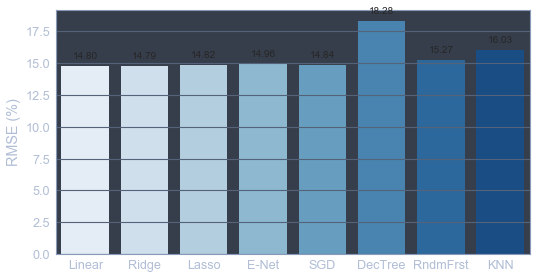

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5,4.5)

splot = sns.barplot(x = regressors, y = rmse, ax = ax, palette = 'Blues')
sns.set_style("whitegrid", {'axes.grid' : False})

plt.ylabel('RMSE (%)')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [29]:
predictions = {'Linear': pred_lm_all, 'Ridge': pred_ridge_all, 'Lasso': pred_lasso_all,
               'ElaNet': pred_enet, 'SGD': pred_sgd, 'DTr': pred_dtree, 'RF': pred_rf,
               'KNN': pred_knn}
df_predictions = pd.DataFrame(data = predictions) 
df_predictions.corr()

,Linear,Ridge,Lasso,ElaNet,SGD,DTr,RF,KNN
Linear,1.000000,0.999985,0.999781,0.998574,0.999964,0.941628,0.977026,0.971549
Ridge,0.999985,1.000000,0.999842,0.998826,0.999940,0.941740,0.977074,0.972064
Lasso,0.999781,0.999842,1.000000,0.999193,0.999778,0.942147,0.977451,0.972203
ElaNet,0.998574,0.998826,0.999193,1.000000,0.998539,0.942017,0.976693,0.974291
SGD,0.999964,0.999940,0.999778,0.998539,1.000000,0.941519,0.977062,0.971322
DTr,0.941628,0.941740,0.942147,0.942017,0.941519,1.000000,0.960509,0.930541
RF,0.977026,0.977074,0.977451,0.976693,0.977062,0.960509,1.000000,0.971091
KNN,0.971549,0.972064,0.972203,0.974291,0.971322,0.930541,0.971091,1.000000


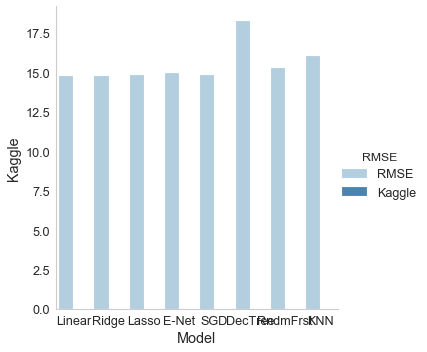

In [30]:
df_rmse_melt = pd.melt(df_rmse, id_vars="Model", var_name="RMSE", value_name="Kaggle")
splot = sns.catplot(x='Model', y='Kaggle', hue='RMSE', data=df_rmse_melt, kind='bar', palette = 'Blues')
